In [6]:
import numpy as np

# 根据年份，获取对应年份的词汇向量集合
def get_vec(year):
    year_npy = 'C:/Users/27496/Desktop/all eng/sgns/'+str(year) + '-w.npy'
    vel_data = np.load(year_npy)
    return vel_data

In [7]:
vec_1950 = get_vec(1950)
vec_1960 = get_vec(1960)
vec_1970 = get_vec(1970)
vec_1980 = get_vec(1980)
vec_1990 = get_vec(1990)

In [8]:
# 根据年代获取词汇集合
def get_words(year):
    import pickle
    year_pkl = 'C:/Users/27496/Desktop/all eng/sgns/'+str(year) +'-vocab.pkl'
    f = open(year_pkl,'rb')
    words = pickle.load(f)
    return words

In [9]:
words_1950 = get_vec(1950)
words_1960 = get_vec(1960)
words_1970 = get_vec(1970)
words_1980 = get_vec(1980)
words_1990 = get_vec(1990)

In [60]:
# 根据年份和词汇，返回词汇对应的向量
def get_wordvec_by_year(word,year):
    #根据年份拿到词汇集合
    words_by_year = get_words(year)
    enu_ = enumerate(words_by_year)
    word_dict = dict()
    for index,w in enu_:
        word_dict[w] = index
    return get_vec(year)[word_dict[word]]

In [61]:
get_wordvec_by_year('wife',1950)

array([ 0.1134817 , -0.03362783,  0.02688783, -0.00985544, -0.06938139,
        0.02264418, -0.10327978,  0.01840162,  0.01679223,  0.05684172,
        0.03167581, -0.07226137,  0.03755   , -0.00816469,  0.07246346,
        0.07646124,  0.05610918, -0.00562461, -0.02156192,  0.06989589,
       -0.06248659,  0.04890082, -0.00232042,  0.03455796, -0.0375756 ,
        0.03242329,  0.05576093, -0.00330331,  0.01958114, -0.09172416,
        0.01957938, -0.11499588, -0.1185433 , -0.09188438, -0.02983426,
        0.11657212,  0.0550202 , -0.02036201,  0.02329106, -0.08468942,
        0.00750317, -0.01859025,  0.03586455,  0.02308952, -0.12638543,
       -0.08879112, -0.07293162, -0.05473428,  0.03311981,  0.06975936,
        0.0437135 , -0.02160531,  0.03515204, -0.08774003,  0.04504584,
        0.02390352, -0.02098671, -0.04303592, -0.0372933 ,  0.04977229,
       -0.0428965 , -0.02194532,  0.06915346, -0.01781965, -0.03473532,
       -0.08658234, -0.01042316,  0.02107255,  0.0068211 , -0.02

In [62]:
# 定义男女词汇的集合
male_list = ['father','son','uncle','brother','man']
female_list = ['aunt','woman','mother','sister','daughter']

In [63]:
# 获取50年代男性中心点
male_center = np.zeros((1, 300), dtype='uint8')
for male in male_list:
    male_center = male_center + get_wordvec_by_year(male,1950)

male_center = male_center/len(male_list)    

# 获取50年代女性中心点
female_center = np.zeros((1, 300), dtype='uint8')
for female in female_list:
    female_center = female_center + get_wordvec_by_year(female,1950)

female_center = female_center/len(female_list)  

In [64]:
# 根据年份，获取男性，或女性的中心
def get_center(gender,year):
    if gender == 1:
        male_center = np.zeros((1, 300), dtype='uint8')
        for male in male_list:
            male_center = male_center + get_wordvec_by_year(male,year)
        return male_center/len(male_list)    
    else:
        female_center = np.zeros((1, 300), dtype='uint8')
        for female in female_list:
            female_center = female_center + get_wordvec_by_year(female,year)
        return female_center/len(female_list)    


In [65]:
jobs = ['teacher','army','nurse','worker','engineer']

In [66]:
#根据年份和工作，计算bias
# f(job) = （男人中心点向量-job向量）-（女人中心点向量-job向量）
# 如f(job)>0,说明偏女性，如=0，说明无偏差，<0 偏男性
def cal_job_bias(job,year):
    job_vec = get_wordvec_by_year(job,year)
    mail_dis =  np.linalg.norm(male_center - job_vec)
    femail_dis =  np.linalg.norm(female_center - job_vec)
    return mail_dis - femail_dis

In [67]:
fin_list=[]
for i in jobs:
    k = []
    for j in range(1890,1991,10):
        print(i+"偏差为:",cal_job_bias(i,j))
        k.append(cal_job_bias(i,j))
    fin_list.append(k)
print(fin_list)

teacher偏差为: -0.05106617564949212
teacher偏差为: -0.056697012834271865
teacher偏差为: -0.024411903749617103
teacher偏差为: -0.018623719435807873
teacher偏差为: -0.032764531814738485
teacher偏差为: -0.042595873316293886
teacher偏差为: -0.05233680663427753
teacher偏差为: -0.033350930855523764
teacher偏差为: -0.03480507413383149
teacher偏差为: -0.02042187998183187
teacher偏差为: -0.042363172895889756
army偏差为: -0.08028287623062846
army偏差为: -0.05944637484342463
army偏差为: -0.08583065068456852
army偏差为: -0.06098035472564578
army偏差为: -0.07640779384419782
army偏差为: -0.06849011522181248
army偏差为: -0.07675272364215346
army偏差为: -0.0538604857264664
army偏差为: -0.07092768272685612
army偏差为: -0.061142794131778144
army偏差为: -0.07069709044251749
nurse偏差为: 0.08676861779742928
nurse偏差为: 0.0590671803525461
nurse偏差为: 0.07646384047642463
nurse偏差为: 0.07080387520641107
nurse偏差为: 0.058496074988383606
nurse偏差为: 0.07728756221248756
nurse偏差为: 0.05695639603848979
nurse偏差为: 0.07410661037389366
nurse偏差为: 0.03496787353596398
nurse偏差为: 0.0555291046427151
n

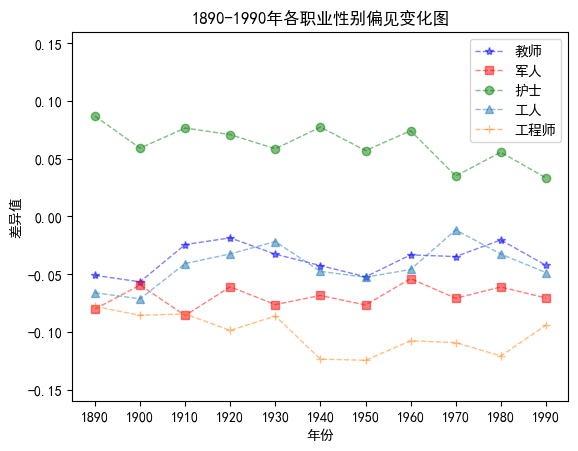

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#epoch,acc,loss,val_acc,val_loss
x_axis_data = [1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990]
y_axis_data1 = fin_list[0]
y_axis_data2 = fin_list[1]
y_axis_data3 = fin_list[2]
y_axis_data4 = fin_list[3]
y_axis_data5 = fin_list[4]
        
#画图 
plt.plot(x_axis_data, y_axis_data1, 'b*--', alpha=0.5, linewidth=1, label='教师')#'
plt.plot(x_axis_data, y_axis_data2, 'rs--', alpha=0.5, linewidth=1, label='军人')
plt.plot(x_axis_data, y_axis_data3, 'go--', alpha=0.5, linewidth=1, label='护士')
plt.plot(x_axis_data, y_axis_data4, '^--', alpha=0.5, linewidth=1, label='工人')
plt.plot(x_axis_data, y_axis_data5, '+--', alpha=0.5, linewidth=1, label='工程师')

plt.legend(loc='upper right')  #显示上面的label



plt.xlabel('年份')
plt.ylabel('差异值')#accuracy
plt.title("1890-1990年各职业性别偏见变化图")#给折线图起名字
plt.xticks(range(1890,1991,10))#设置x轴坐标显示
plt.ylim(-0.16,0.16)#仅设置y轴坐标范围
plt.show()

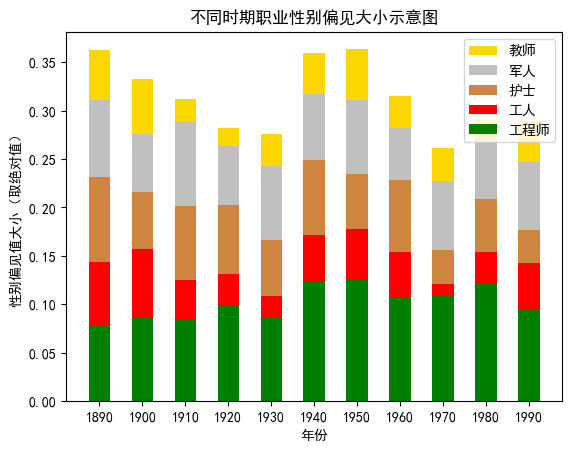

In [70]:
#表示各个时期（以每10年为一个单位）的职业性别偏差大小（取绝对值）
import numpy as np
import matplotlib.pyplot as plt
x = [1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990]
fin_list1=[]
for l in fin_list:
    s1=[]
    for o in l:
        if o<0:
            o=-o
            s1.append(o)
        else:
            s1.append(o)
    
    fin_list1.append(s1)
teacher = np.array(fin_list1[0]) 
army = np.array(fin_list1[1]) 
nurse = np.array(fin_list1[2])
worker = np.array(fin_list1[3])
engineer = np.array(fin_list1[4])
# 此处的 _ 下划线表示将循环取到的值放弃，只得到[0,1,2,3,4]
ind = [x for x, _ in enumerate(x)] 
#绘制堆叠图
plt.bar(ind, teacher, width=0.5, label='教师', color='gold',bottom=engineer+worker+nurse+army) 
plt.bar(ind, army, width=0.5, label='军人', color='silver',bottom=engineer+worker+nurse) 
plt.bar(ind, nurse, width=0.5, label='护士', color='#CD853F',bottom=engineer+worker) 
plt.bar(ind, worker, width=0.5, label='工人', color='red',bottom=engineer)
plt.bar(ind, engineer, width=0.5, label='工程师', color='green')
#设置坐标轴
plt.xticks(ind, x)
plt.ylabel("性别偏见值大小（取绝对值）") 
plt.xlabel("年份") 
plt.legend(loc="upper right") 
plt.title("不同时期职业性别偏见大小示意图")
plt.show()


[0.1341817239048324, 0.29715914307527536, 0.4983856539897026, 0.6619656625231015, 0.7923579849345389]


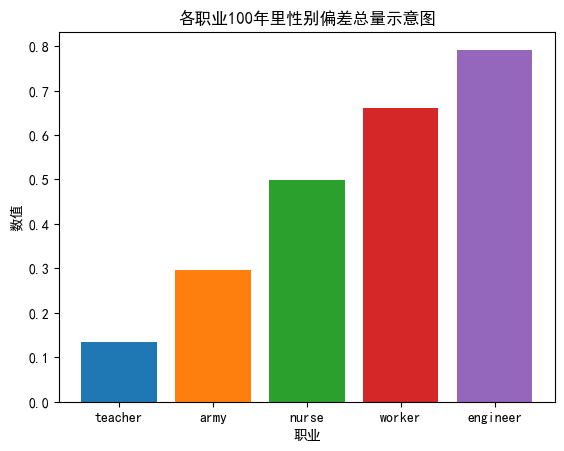

In [16]:
#表示这100年里，各个职业性别偏见的变化总值（取绝对值）
#首先求得职业的性别偏差总变化值
s3 = 0
s4 = 0
s5 = []
for q in fin_list1:
    for w in range(0,10):
        if q[w]-q[w+1]>0:
            s6 =q[w]-q[w+1]
        else:
            s6=q[w]-q[w+1]
            s6 = -s6
        s2 = s6+s4
        s4 = s2
    s5.append(s2)
print(s5)
#得到数据后开始描绘柱状图
x_data = ["teacher","army","nurse","worker","engineer"]
y_data = s5 
import matplotlib.pyplot as plt 
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False 
for i in range(len(x_data)):
    plt.bar(x_data[i],y_data[i]) 
plt.title("各职业100年里性别偏差总量示意图")
plt.xlabel("职业")
plt.ylabel("数值")
 
plt.show()
  


In [19]:
print(fin_list1)

[[0.05106617564949212, 0.056697012834271865, 0.024411903749617103, 0.018623719435807873, 0.032764531814738485, 0.042595873316293886, 0.05233680663427753, 0.033350930855523764, 0.03480507413383149, 0.02042187998183187, 0.042363172895889756], [0.08028287623062846, 0.05944637484342463, 0.08583065068456852, 0.06098035472564578, 0.07640779384419782, 0.06849011522181248, 0.07675272364215346, 0.0538604857264664, 0.07092768272685612, 0.061142794131778144, 0.07069709044251749], [0.08676861779742928, 0.0590671803525461, 0.07646384047642463, 0.07080387520641107, 0.058496074988383606, 0.07728756221248756, 0.05695639603848979, 0.07410661037389366, 0.03496787353596398, 0.0555291046427151, 0.033341292463276995], [0.06615429853452404, 0.07139463326936535, 0.040879752704514605, 0.0324883733867003, 0.02184369813913012, 0.04765001108606892, 0.05271710166767174, 0.046000947855876495, 0.011720770121921076, 0.03266016968352625, 0.048639773715951184], [0.07799845709538933, 0.08568605825845266, 0.084522167621

In [22]:
#接下来制作动态变化柱形图

from pyecharts.charts import *
from pyecharts.options import *
from pyecharts.globals import *

#导入文件数据
f = open(r'C:\Users\27496\Desktop\职业偏见.CSV',"r",encoding="GB2312")
#取每行数据
data_lines = f.readlines()
#关闭文件
f.close()
#第一行数据多余，因此删除
data_lines.pop(0)
#创建一个数据字典
data_dict = {}
#遍历每行数据
for line in data_lines:
    year = int(line.split(",")[0])    
    country = line.split(",")[1]      
    gdp = float(line.split(",")[2])   
    #将年份作为key,国家和gdp构成列表作为value
    try:
        data_dict[year].append([country,gdp])
    except KeyError:
        data_dict[year] = []
        data_dict[year].append([country, gdp])
#按年份从小到大排序
sorted_year_list = sorted(data_dict.keys())
#创建一个时间轴
timeline = Timeline(
    {"theme":ThemeType.LIGHT}
)
#遍历每一年,1960-2019
for year in sorted_year_list:
    #将该一年所有城市按gdp从大到小排序
    data_dict[year].sort(key=lambda element:element[1],reverse=True)
    year_data = data_dict[year]
    x_data=[]
    y_data=[]
    for data in year_data:
        x_data.append(data[0])
        y_data.append(data[1]/1)#显示数值
    x_data.reverse()
    y_data.reverse()
    #创建柱状图
    bar=Bar()
    #传入x轴数据
    bar.add_xaxis(x_data)
    #传入y轴数据
    bar.add_yaxis("偏见值",y_data,label_opts=LabelOpts(position="right"))
    #将x轴和y轴翻转
    bar.reversal_axis()
    #设置标题
    bar.set_global_opts(
        title_opts=TitleOpts(title="%s职业性别偏差动态变化图"%year)
    )
    timeline.add(bar,str(year))
timeline.add_schema(
    play_interval=500,       #变化间隔
    is_timeline_show=True,    #显示时间
    is_loop_play=True,        #循环变化
    is_auto_play=True         #自动播放
)
timeline.render("动态柱状图.html")             #绘图

'C:\\Users\\27496\\timeline_bar_reversal_bar.html'